### We have a three exploring function and interval $x \in [-N, N]$, when N is number of variant
$$F_1(x) = (x - \frac{N}{2})^2 + N * x$$

$$F_2(x) = (x - \frac{N}{2})^2 + N * x^2$$

$$F_3(x) = (x - \frac{N}{2})^2 + sin(N * x)$$

#### For N = 4, we have interval  $x \in [-4, 4]$ and functions:
$F_1(x) = (x - 2)^2 + 4x$

$F_2(x) = (x - 2)^2 + 4x^2$

$F_3(x) = (x - 2)^2 + sin(4x)$

#### We need to find a analytic minimum value for these functions:
$F_1'(x) = 2x = 0    \Rightarrow $  

$x = 0, F_1(x) = 4 $
***
$F_2'(x) = 10x - 4 = 0    \Rightarrow $      

$ x = 0.4, F_2(x) = 3.2 $
***
$F_3'(x) = 2(x - 2) + 4cos(4x) = 0    \Rightarrow$   

$ x \approx 2.664, F_3(x) \approx -0.502 $

In [2]:
from abc import ABC, abstractmethod
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

x1 = 0
x2 = 0.4
x3 = 2.664


def func_first(N: int):
    def function(x: float):
        return (x - N / 2) ** 2 + N * x
    return function


def func_second(N: int):
    def function(x: float):
        return (x - N / 2) ** 2 + N * x**2
    return function


def func_third(N: int):
    def function(x: float):
        return (x - N / 2) ** 2 + math.sin(N * x)
    return function

In [3]:
class AnalysisFunction:
    def __init__(self,function, N, x, name):
        self.N = N
        self.a = -N
        self.b = N
        self.func = function
        self.name = name
        self.solution = x
    
    def plot_graph(self):
        x = np.linspace(self.a, self.b, 100)
        y = [self.func(x_val) for x_val in x]
        lines = plt.plot(x, y, self.solution, self.func(self.solution), 'o')
        plt.setp(lines[0], linewidth=1)
        plt.setp(lines[1], markersize=10)
        plt.legend((self.name, 'Min value'),
           loc='upper right')
        plt.grid()
        plt.title('Graph of function ' + self.name)
        plt.show()
        
    def build_table(self, method):
        m = method(self.func, self.a, self.b, self.N)
        x = m.get_list_finding_values()
        y = [self.func(x_val) for x_val in x]
        k = list(range(len(x)))
        table = pd.DataFrame({
            'num of iter': k,
            'x' + self.name[-1]: x,
            self.name: y
        })
        
        return table
    
    def calculate_convergence(self, method):
        m = method(self.func, self.a, self.b, self.N)
        x = m.get_list_finding_values()
        z = [abs(x_ - self.solution) for x_ in x]
        fig, ax = plt.subplots()
        ax.plot(list(range(len(x))), z)
        ax.set(xlabel='Number of iteration', ylabel='Z(k)',
               title='Convergence of method ' + m.__class__.__name__ 
                + ' ({})'.format(self.name))
        ax.legend([self.name])
        ax.grid()
        plt.show()

In [4]:
class MethodFindingMinValue(ABC):
    def __init__(self, func, a: float, b: float, N: int):
        self.func = func
        self.a = a
        self.b = b
        self.N = N
    
    def get_min_value(self):
        return self.get_list_finding_values()[-1]
    
    @abstractmethod
    def get_list_finding_values(self):
        pass

In [5]:
class BruteForce(MethodFindingMinValue):
    def __init__(self, func, a: float, b: float, N: int):
        super().__init__(func, a, b, N)
        
    def get_list_finding_values(self):
        x = [self.a + i * (self.b - self.a) / self.N for i in range(self.N + 1)]
        y = [self.func(x_val) for x_val in x]
        return x[:y.index(min(y)) + 1]

In [6]:
def merge_tables(a, b, c):
    return pd.merge(a, pd.merge(b, c, how='outer'), how='outer')

In [7]:
analysis_first_func = AnalysisFunction(func_first(4), 4, x1, 'F1')
analysis_second_func = AnalysisFunction(func_second(4), 4, x2, 'F2')
analysis_third_func = AnalysisFunction(func_third(4), 4, x3, 'F3')

#### Graphics of our function with a minimum point

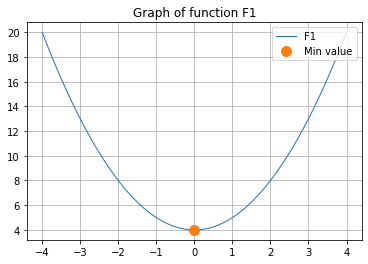

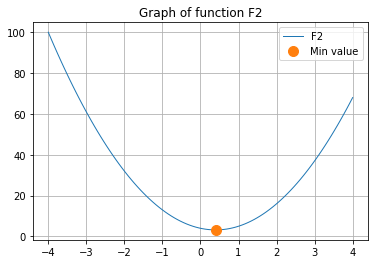

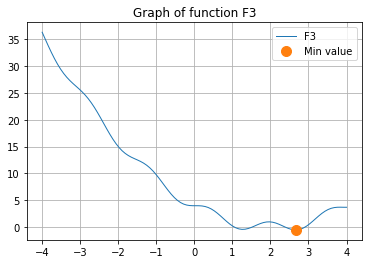

In [8]:
analysis_first_func.plot_graph()
analysis_second_func.plot_graph()
analysis_third_func.plot_graph()

#### Table of result of a Brute force method

In [55]:
brute_force_f1 = analysis_first_func.build_table(BruteForce)
brute_force_f2 = analysis_second_func.build_table(BruteForce)
brute_force_f3 = analysis_third_func.build_table(BruteForce)
merge_tables(brute_force_f1, brute_force_f2, brute_force_f3)

,num of iter,x1,F1,x2,F2,x3,F3
0,0,-4.0,20.0,-4.0,100.0,-4.0,36.287903
1,1,-2.0,8.0,-2.0,32.0,-2.0,15.010642
2,2,0.0,4.0,0.0,4.0,0.0,4.000000
3,3,NaN,NaN,NaN,NaN,2.0,0.989358


#### Graph of convergence a Brute force method

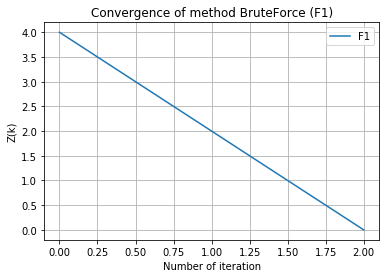

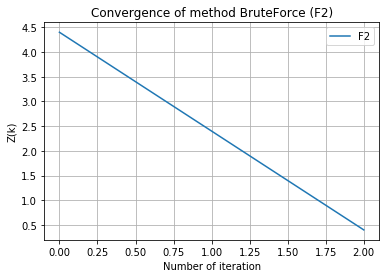

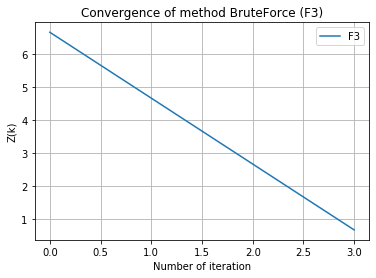

In [58]:
analysis_first_func.calculate_convergence(BruteForce)
analysis_second_func.calculate_convergence(BruteForce)
analysis_third_func.calculate_convergence(BruteForce)